In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [4]:
def gen_data(n):
    x=[]
    y=[]
    r_x1=np.random.rand()
    r_x2=np.random.rand()
    for i in range(n):
        x1=i
        x2=i/2 + np.random.rand()*n
        x.append([1,x1,x2])
        y.append(r_x1 * x1+r_x2*x2+1)
    return np.array(x), np.array(y)

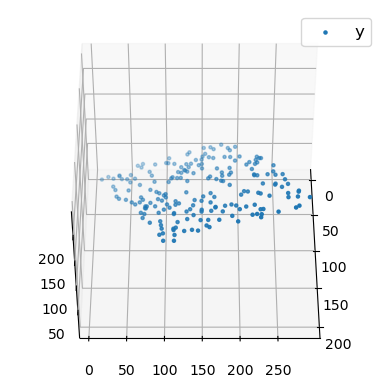

In [5]:
x,y =gen_data(200)
mpl.rcParams['legend.fontsize']=12

fig=plt.figure()
ax=fig.add_subplot(projection='3d')

ax.scatter(x[:,1],x[:,2],y,label='y',s=5)
ax.legend()
ax.view_init(45,0)

plt.show()

In [6]:
def mse(coef,x,y):
    return np.mean((np.dot(x,coef)-y)**2)/2

In [8]:
def gd(coef, x,y):
    return np.mean(x.transpose()*(np.dot(x,coef)-y), axis=1)

In [15]:
def mlr(coef,x,y,lr,b1=0.9,b2=0.999,epsilon=1e-8):
    pe=0
    m_coef=np.zeros(coef.shape)
    v_coef=np.zeros(coef.shape)
    mo_m_coef=np.zeros(coef.shape)
    mo_v_coef=np.zeros(coef.shape)
    t=0
    
    while True:
        error=mse(coef,x,y)
        if abs (error-pe)<=epsilon:
            break
        pe=error
        grad=gd(coef,x,y)
        t+=1
        m_coef=b1*m_coef+(1-b1)*grad
        v_coef=b2*v_coef+(1-b2)*grad**2
        mo_m_coef=m_coef/(1-b1**t)
        mo_v_coef=v_coef/(1-b2**t)
        
        delta=((lr/mo_v_coef**0.5+1e-8)*(b1*mo_m_coef + (1-b1)*grad/(1-b1**t)))
        coef=np.subtract(coef,delta)
    return coef
    

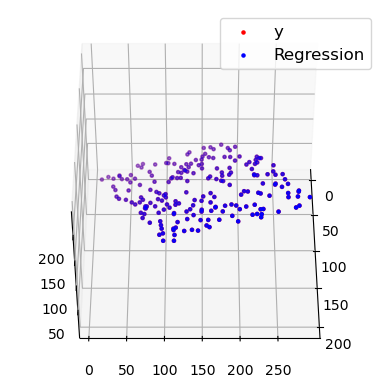

In [16]:
coef = np.array([0,0,0])
c=mlr(coef,x,y,1e-1)
fig=plt.figure()
ax=fig.add_subplot(projection='3d')

ax.scatter(x[:,1],x[:,2],y, label='y', s=5, color="Red")
ax.scatter(x[:,1],x[:,2], c[0] +c[1]*x[:,1]+c[2]*x[:,2], label="Regression", s=5, color="Blue")
ax.view_init(45,0)
ax.legend()

plt.show()